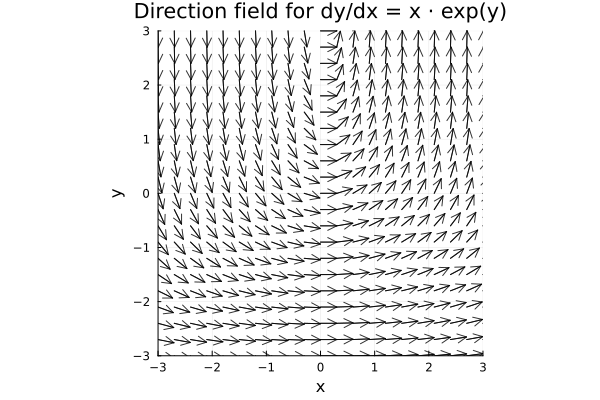

In [1]:
using Plots

# Right-hand side of the ODE dy/dx = f(x,y)
f(x, y) = x * exp(y)

# Grid and styling (tweak these to taste)
xrange = -3:0.3:3
yrange = -3:0.3:3
L = 0.3               # length of the little line segments

# Build quiver data: vectors of unit direction scaled to length L
xv = Float64[]; yv = Float64[]; u = Float64[]; v = Float64[]
for y in yrange, x in xrange
    m = f(x, y)                    # slope at (x,y)
    s = L / sqrt(1 + m^2)          # scale so each segment has length ~ L
    push!(xv, x);  push!(yv, y)
    push!(u, s);  push!(v, m * s)  # (u,v) is the oriented segment at (x,y)
end

# Plot the direction field
plt = plot()
quiver!(plt, xv, yv, quiver=(u, v), color=:black, linealpha=0.8,
       aspect_ratio=:equal, legend=false,
       xlim=(first(xrange), last(xrange)), ylim=(first(yrange), last(yrange)),
       xlabel="x", ylabel="y", title="Direction field for dy/dx = x · exp(y)")

display(plt)


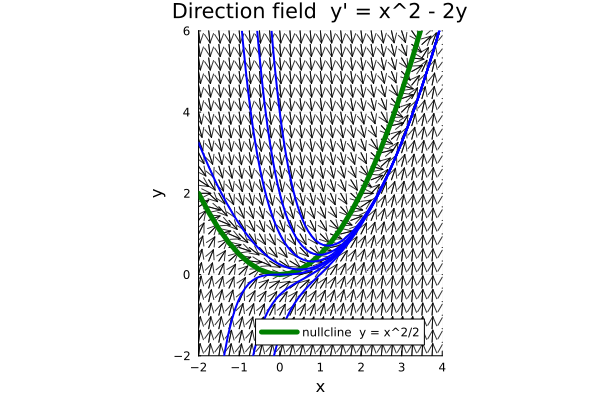

In [2]:
# ========== Direction field for y' = x^2 - 2y with nullcline & solutions ==========
using Plots
using DifferentialEquations

# Right-hand side
f(x, y) = x^2 - 2y

# Grid for the direction field
xmin, xmax = -2.0, 4.0
ymin, ymax = -2.0, 6.0
nx, ny = 25, 25
xs = range(xmin, xmax; length=nx)
ys = range(ymin, ymax; length=ny)
X = repeat(collect(xs)', ny, 1)          # ny × nx
Y = repeat(collect(ys), 1, nx)           # ny × nx

# Slopes and normalized quiver vectors (unit x-component segments)
M = f.(X, Y)
U = ones(size(M)) ./ sqrt.(1 .+ M.^2)    # dx
V = M ./ sqrt.(1 .+ M.^2)                # dy

# Adjust size of arrows (optional)
L = 0.3
U .*= L
V .*= L

# Base plot with direction field
plt = quiver(vec(X), vec(Y), quiver=(vec(U), vec(V)),
             xlim=(xmin, xmax), ylim=(ymin, ymax),
             aspect_ratio=:equal, legend=true, color =:black, linealpha=0.8,
             xlabel="x", ylabel="y",
             title="Direction field  y' = x^2 - 2y")

# Nullcline y = (1/2) x^2
plot!(plt, xs, 0.5 .* xs.^2, lw=5, label="nullcline  y = x^2/2", color=:green)

# Asymptotic particular solution y* = x^2/2 - x/2 + 1/4 (optional but insightful)
# plot!(plt, xs, 0.5 .* xs.^2 .- 0.5 .* xs .+ 0.25, lw=5, label="asymptote y*", color=:red)

# Sample solution curves from several initial values at x0 = 0
x0 = 0.0
y0s = [-1.5, -0.5, 0.0, 0.25, 1.0, 2.0, 4.0]
g(u, p, x) = x^2 - 2u

for y0 in y0s
    # forward
    prob_f = ODEProblem(g, y0, (x0, xmax))
    sol_f = solve(prob_f; reltol=1e-9, abstol=1e-9)
    plot!(plt, sol_f.t, sol_f.u, label=false, color =:blue, lw=2)

    # backward (to show both sides of the field)
    prob_b = ODEProblem(g, y0, (x0, xmin))
    sol_b = solve(prob_b; reltol=1e-9, abstol=1e-9)
    plot!(plt, sol_b.t, sol_b.u, label=false, color =:blue, lw=2)
end

display(plt)
